In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline

df = pd.read_csv(r'C:\Users\bjlin\OneDrive\Desktop\PythonAbgabe\inventory-management.csv')
df.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
5,2022-01-01,S001,P0006,Toys,North,209,60,0,35.53,0,Snowy,0,40.01,Winter,0,55
6,2022-01-01,S001,P0007,Groceries,North,118,81,335,23.27,5,Snowy,0,24.78,Winter,0,94
7,2022-01-01,S001,P0008,Electronics,North,244,42,0,37.79,5,Snowy,0,44.85,Winter,0,61
8,2022-01-01,S001,P0009,Clothing,North,115,88,139,94.20,5,Snowy,0,108.70,Winter,0,129
9,2022-01-01,S001,P0010,Furniture,North,192,70,300,113.35,10,Snowy,0,129.98,Winter,0,69


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1722 non-null   object 
 1   Store ID            1722 non-null   object 
 2   Product ID          1722 non-null   object 
 3   Category            1722 non-null   object 
 4   Region              1722 non-null   object 
 5   Inventory Level     1722 non-null   int64  
 6   Units Sold          1722 non-null   int64  
 7   Units Ordered       1722 non-null   int64  
 8   Price               1722 non-null   float64
 9   Discount            1722 non-null   int64  
 10  Weather Condition   1722 non-null   object 
 11  Promotion           1722 non-null   int64  
 12  Competitor Pricing  1722 non-null   float64
 13  Seasonality         1722 non-null   object 
 14  Epidemic            1722 non-null   int64  
 15  Demand              1722 non-null   int64  
dtypes: flo

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.00000,1722.000000,1722.0,1722.000000
mean,287.062137,92.157956,106.774681,69.319779,9.593496,0.36295,71.317904,0.0,113.292683
std,230.576241,44.452568,173.353713,40.330698,7.638531,0.48099,41.952724,0.0,43.943909
min,0.000000,0.000000,0.000000,5.960000,0.000000,0.00000,5.410000,0.0,4.000000
25%,133.000000,62.000000,0.000000,33.102500,5.000000,0.00000,33.622500,0.0,82.000000
50%,213.000000,87.000000,0.000000,66.785000,10.000000,0.00000,67.825000,0.0,108.000000
75%,367.750000,118.000000,154.750000,96.927500,15.000000,1.00000,101.585000,0.0,140.000000
max,1470.000000,315.000000,1074.000000,228.030000,25.000000,1.00000,236.040000,0.0,307.000000


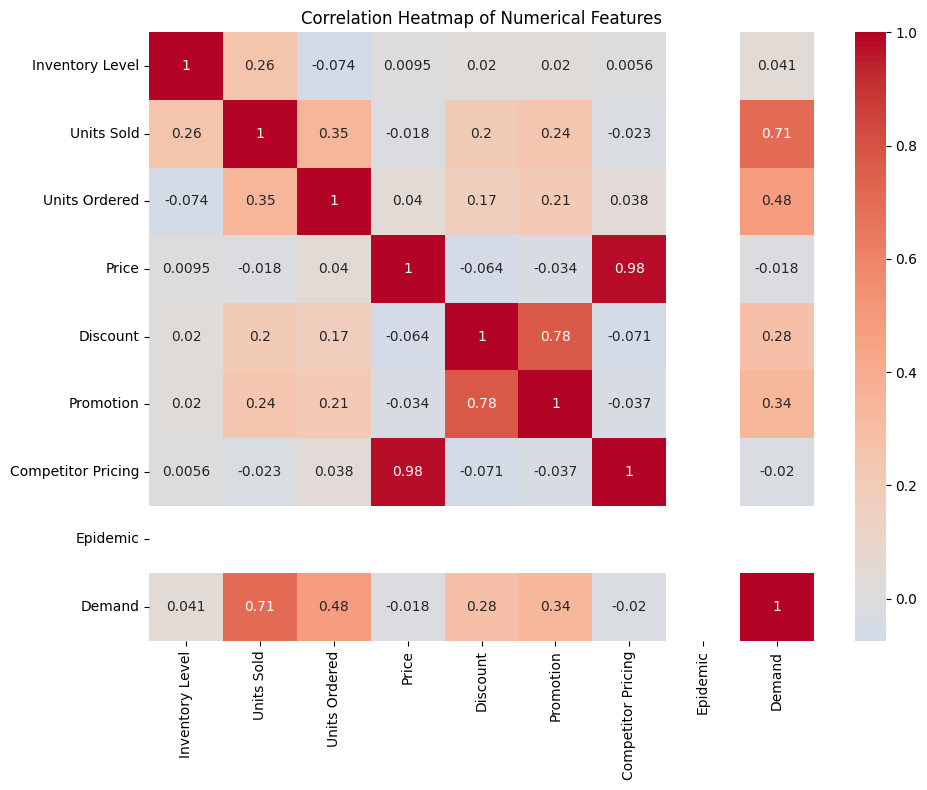

In [7]:
# Get only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()  # Prevents label cutoff
plt.show()

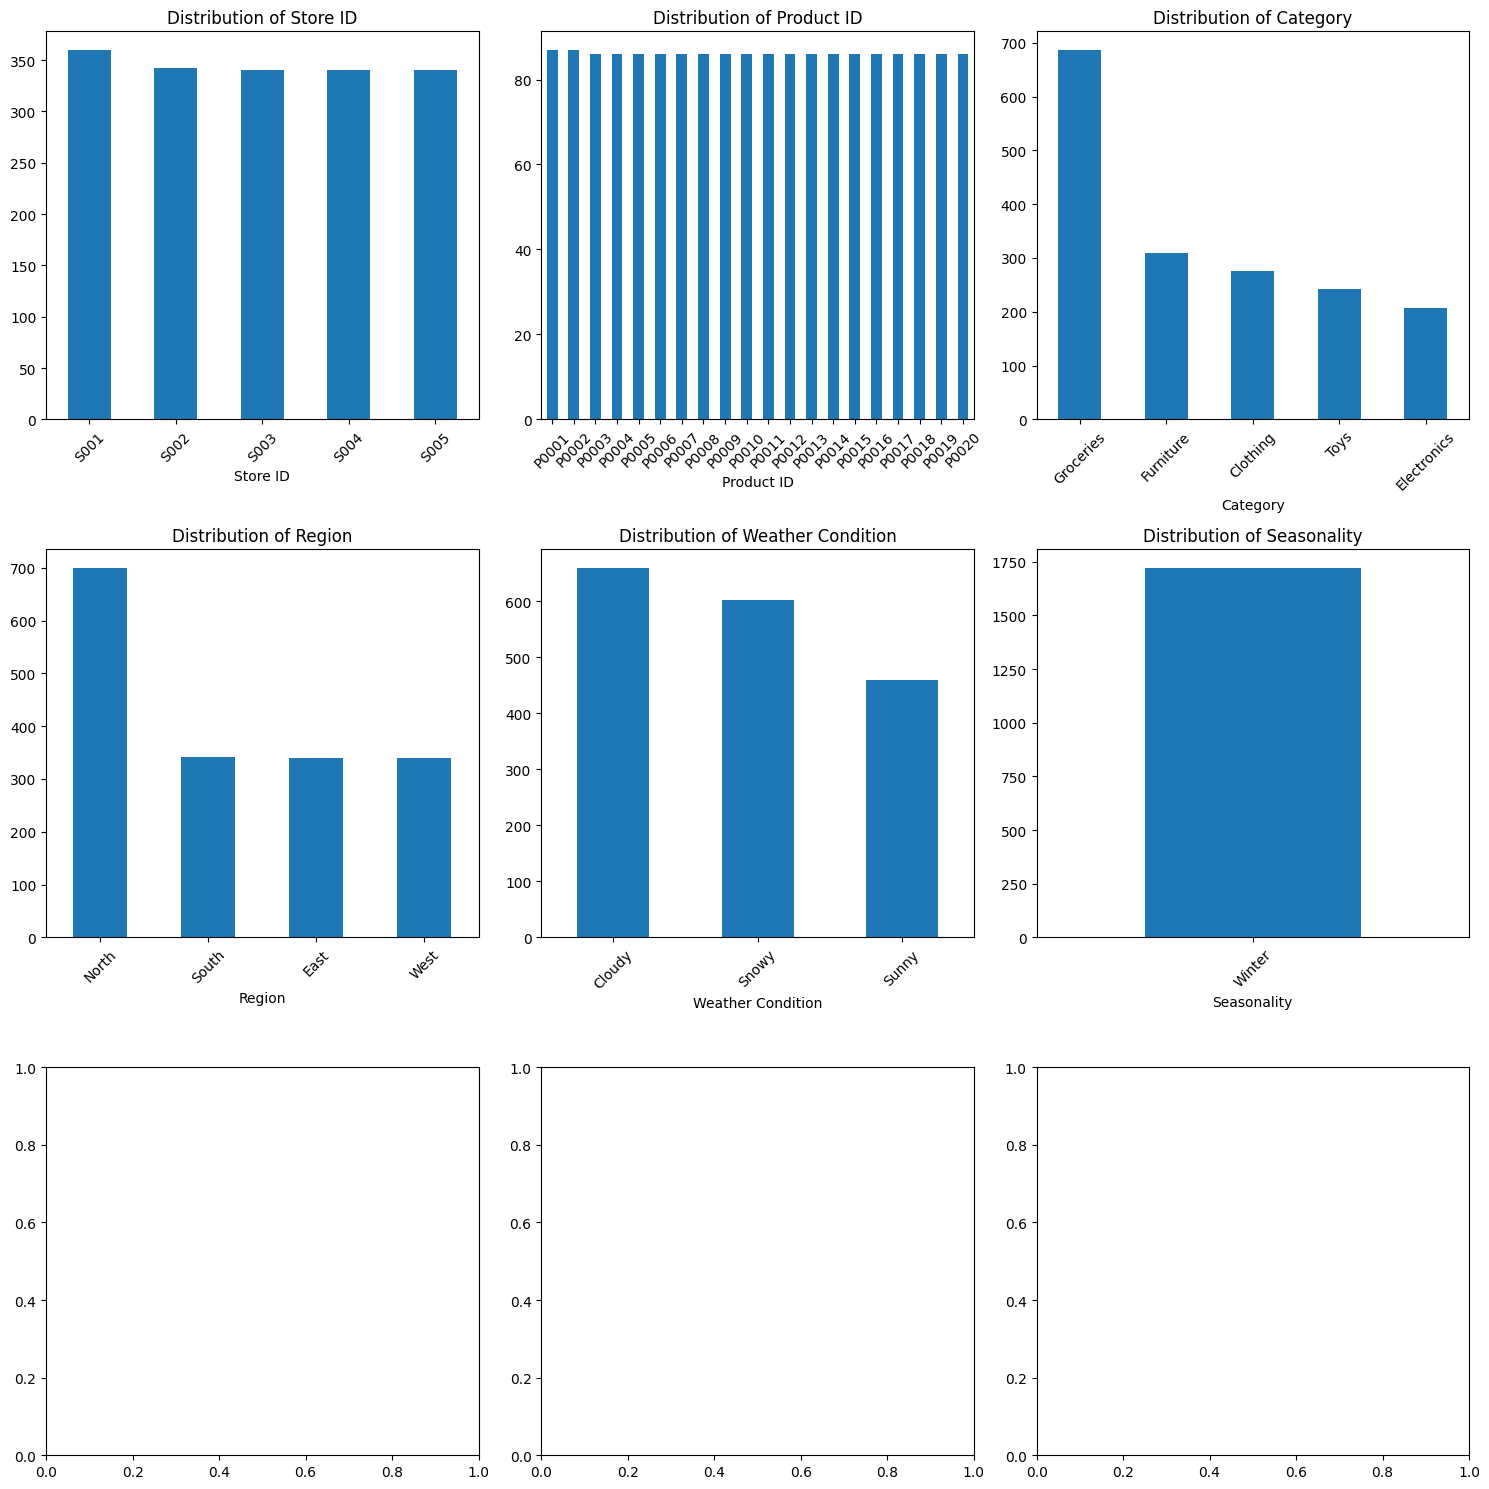

In [12]:
# Create subplots for each categorical column
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

categorical_columns = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']

for idx, col in enumerate(categorical_columns):
    # Count frequency of each category
    value_counts = df[col].value_counts()
    
    # Create bar plot
    value_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Cleansing

In [13]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1717    False
1718    False
1719    False
1720    False
1721    False
Length: 1722, dtype: bool


In [14]:
df.isnull().sum()	

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64